<center>
   <img src=https://the1joshuagroup.com/VADSTI/assets/img/HU-RCMI-Logo-Dark.gif>
</center>

## Module 4: Clustering

### Machine Learning

1. Gathering a training dataset
2. Building a model based on the training dataset
3. Applying the model to new data and making predictions

We can distinguish:
- Supervised learning
- Unsupervised learning

### Supervised Learning

In supervised learning the examples in the dataset are **labeled**.

The dataset $X$ contains $N$ examples.
Each example $x_i$ is represented by a feature vector of dimensionality D: $ x^{(j)} $, $j = 1..D$, meaning that there are D features. A feature can be viewed as a variable.

The **labeled** dataset has a vector of labels $y$ of dimensionality $N$:  $\{(x_i, y_i)\}^{N}_{i=1}$

###  Classification (categoric label) vs Regression (continuous label)

Regression and classification methods are related: consider that we predicting the probability of belonging to class A as in binary classification. Probability is a continuous numeric variable. Thus, for instance, Logistic Regression is a classification method.

### Unsupervised Learning
Uncovering hidden structure from **unlabeled data**

- Clustering
- Latent (hidden) variable modeling: mixture models, factor analysis
- Dimensionality reduction, matrix factorization and feature selection


### Classification (supervised) vs Clustering (unsupervised)
In clustering we attempt to group observations in such a way that observations assigned to the same cluster are more similar to each other than to observations in other clusters. There is no cluster assignment needed to learn from, the number of categories (clusters) is usually unknown too.

![](https://scikit-learn.org/stable/_static/ml_map.png)

### Clustering

Although labels may be known, clustering is usually performed on unlabeled data as a step in exploratory data analysis.

The best method to use will vary depending on the particular problem.

Can you think of examples of clustering problems?

Before we use Python code to cluster observations,
let's visually explore two clustering algorithms:
- K-means: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- DBSCAN: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In groups, describe the two clustering algorithms (K-means and DBSCAN) in your own words.
- How does each algorithm work? What steps does each take?
- Did you notice any limitations

### Comparison of observations

Observations assigned to the same cluster **are more similar**. What does it mean for observations to be similar?

There are many different types of distance metrics.

![](https://miro.medium.com/max/6800/1*n97707zKau5I5libJWl_XQ.png)

Source: https://towardsdatascience.com/17-types-of-similarity-and-dissimilarity-measures-used-in-data-science-3eb914d2681

Minkowsky distance:  $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

for Euclidean: p=2, for Manhattan: p=1

![](https://miro.medium.com/max/1400/1*cKzSQ2gpXnHFXAALCxPceQ.png)

Source: https://towardsdatascience.com/17-types-of-similarity-and-dissimilarity-measures-used-in-data-science-3eb914d2681

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import scipy.spatial.distance
from sklearn.metrics import pairwise_distances

### Distances and similarities between data points

(0.95, 2.05, 3.95, 5.05)

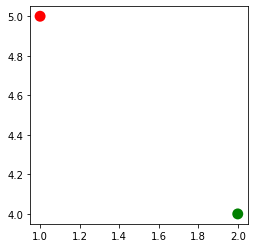

In [2]:
X = np.array([[1, 5],
              [2, 4]])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(X[...,0], X[...,1], c=("red", "green"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')

In [3]:
D = pairwise_distances(X, metric = 'euclidean')
print("Euclidean\n", D)
print()

Euclidean
 [[0.         1.41421356]
 [1.41421356 0.        ]]



In [4]:
D = pairwise_distances(X, metric = 'manhattan')
print("Manhattan\n", D)

Manhattan
 [[0. 2.]
 [2. 0.]]


In [5]:
## Works the same way for 3 or higher dimensions:
X = np.array([[6, 0.0, 1.0],
              [2, 1, 3.0]])

D = pairwise_distances(X, metric = 'euclidean')
print("Euclidean\n", D)
D = pairwise_distances(X, metric = 'manhattan')
print("\nManhattan\n", D)
D = pairwise_distances(X + 10, metric = 'cosine')
print("\nCosine\n", D)
D = pairwise_distances(X*2 + 20, metric = 'correlation')
print("\nCorrelation\n", D)

Euclidean
 [[0.         4.58257569]
 [4.58257569 0.        ]]

Manhattan
 [[0. 7.]
 [7. 0.]]

Cosine
 [[0.         0.02196149]
 [0.02196149 0.        ]]

Correlation
 [[0.         0.84445725]
 [0.84445725 0.        ]]


## What about binary data

In [6]:
binary = np.array([[0, 0, 1, 1, 1, 0, 0],
                   [0, 1, 1, 1, 0, 0, 0]], dtype=np.bool)
print(binary)
D = pairwise_distances(binary, metric = 'jaccard')
print("\nJaccard\n", D)
D = pairwise_distances(binary, metric = 'hamming')
print("\nHamming\n", D)

[[False False  True  True  True False False]
 [False  True  True  True False False False]]

Jaccard
 [[0.  0.5]
 [0.5 0. ]]

Hamming
 [[0.         0.28571429]
 [0.28571429 0.        ]]


### Synthetic data

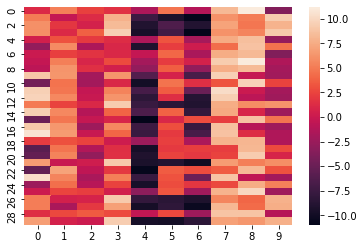

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=30, centers=4, n_features=10, random_state=0, cluster_std=1.0)

sns.heatmap(X)
plt.show()

Distribution of pairwise distances


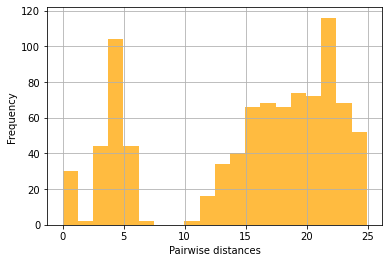

In [8]:
D = pairwise_distances(X, metric='euclidean', n_jobs=-1)
print("Distribution of pairwise distances")
plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Clustering of data reveals its inner structure

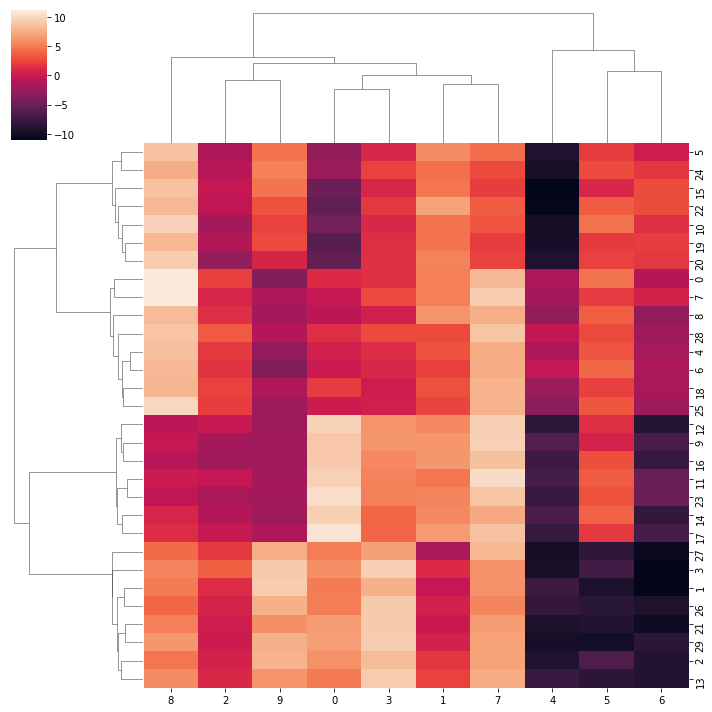

In [9]:
sns.clustermap(X)

### Different clustering algorithms implemented in scikit-learn

Note the last row is completely homogeneous, however clustering algorithm still reports "some inner structure"

![Cluster comparison](http://scikit-learn.org/0.20/_images/sphx_glr_plot_cluster_comparison_001.png)
[Cluster comparison](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)


### Families of clustering algorithms

All of the algorithms are "Hard clustering" methods: each object belongs to a cluster or not

**Connectivity**: agglomerative hierarchical clustering

**Centroids**: k-means, Mean Shift

**Density**: DBSCAN

**Distributions**: GMM (next class)

**Affinity**: Affinity propagation, Spectral clustering (next classes)



### K-means
![](https://miro.medium.com/max/806/1*P2UZY15WFlfCbyTwta6IYQ.png)

![](https://chrisalbon.com/images/machine_learning_flashcards/K-Means_Clustering_print.png)

Source: https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

![Kmeans](https://uploads.toptal.io/blog/image/92528/toptal-blog-image-1463672901961-c86610183bb2ba67f979c421f6748893.gif)

1. Choose centroids
2. Assign clusters
3. Repeat until convergence / max iterations

![Kmeans](https://cdn-images-1.medium.com/max/1600/1*KrcZK0xYgTa4qFrVr0fO2w.gif)

**K-means** clustering divides samples between clusters by attempting to minimize the within-cluster sum of squares. It is an iterative algorithm repeatedly updating the position of the centroids (cluster centers), re-assigning samples to the best cluster and repeating until an optimal solution is reached. The clusters will depend on the starting position of the centroids so k-means is often run multiple times with random initialization and then the best solution chosen.

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

To get the sum of squared distances of samples to their cluster center:

    model.inertia_

Note: Inertia is comparatively meaningful, absolutely meaningless (lower is better).



## Overview of other clustering methods

### Mean shift

Mean shift does not require the number of clusters K, which is a huge advantage!

However depends on the radius parameter "r", it is not trivial to find it.

![](https://cdn-images-1.medium.com/max/1600/1*vyz94J_76dsVToaa4VG1Zg.gif)

![](https://chrisalbon.com/images/machine_learning_flashcards/Meanshift_Clustering_By_Analogy_print.png)

### Density-based spacial clustering (DBSCAN)

Finds neighbors within a distance radius starting from random points.

![](https://cdn-images-1.medium.com/max/1600/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

![](https://chrisalbon.com/images/machine_learning_flashcards/DBSCAN_print.png)

### Hierarchical clustering

**Agglomerative** hierarchical clustering starts with each observation is its own cluster, and pairs are joined (by a given criteria and metric) as you go up the tree.

**Metric**: Some kind of distance (Euclidean, Manhattan...)

**Criteria**: Distance between sets (max, min, average) corresponds to Complete linkage, Single linkage, UPGMA. Special case is Ward linkage which corresponds to minimum increase in total within-cluster variance after merging.


![](https://cdn-images-1.medium.com/max/1600/1*ET8kCcPpr893vNZFs8j4xg.gif)

![](https://chrisalbon.com/images/machine_learning_flashcards/Aggomerative_Clustering_print.png)

### Iris Dataset

![image.png](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
iris = datasets.load_iris()

columns = ("sepal_length", "sepal_width", "petal_length", "petal_width", "species")

iris_4d = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns=columns)
iris_true_labels = iris_4d["species"]
iris_4d = iris_4d.drop(columns="species")

iris = iris_4d.drop(columns=["petal_width", "petal_length"])
#print(iris_4d)
#print(iris)

In [11]:
from sklearn.cluster import KMeans

model = KMeans(
    n_clusters=2,
    init='k-means++', # default, also: random
    n_init=10, # default, also: 5, 1
    max_iter=300, # default
    tol=1e-4, # default
    random_state=123124,
)
# model.fit(iris)
cluster_labels = model.fit_predict(iris)
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0]


In [12]:
def plot_kmeans(original_data, cluster_labels, model, k):
    """Plot the clusters and centroids for a model trained on the Iris dataset."""
    # Scatter plots of each species
    for cluster_idx in range(k):
        plt.scatter(
            original_data.iloc[cluster_labels == cluster_idx, 0],
            original_data.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()
    #plt.scatter(original_data[cluster_labels == 1, 0], original_data[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Species 1')

    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        s=100,
        c='red',
    )

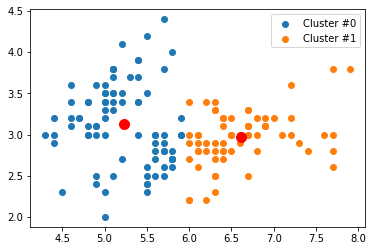

In [13]:
model = KMeans(
    n_clusters=2,
    init="k-means++", #'k-means++', # default, also: random
    n_init=100, # default, also: 20, 5, 1
    max_iter=100, # default / 1
)
model.fit(iris)
cluster_labels = model.predict(iris)
plot_kmeans(iris, cluster_labels, model, 2)

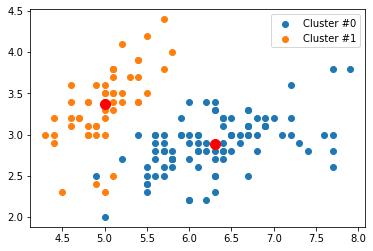

In [14]:
# 4-dimensional Iris dataset

model = KMeans(
    n_clusters=2,
    init="random", #'k-means++', # default, also: random
    n_init=10, # default, also: 20, 5, 1
    max_iter=100, # default / 1
)
model.fit(iris_4d)
cluster_labels = model.predict(iris_4d)
plot_kmeans(iris, cluster_labels, model, 2)

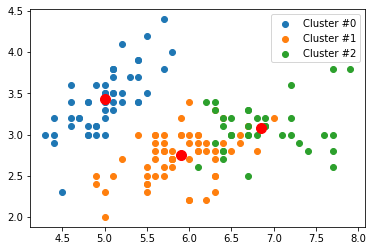

In [15]:
model = KMeans(
    n_clusters=3,
    init="k-means++", #'k-means++', # default, also: random
    n_init=100, # default, also: 20, 5, 1
    max_iter=100, # default / 1
)
model.fit(iris_4d)
cluster_labels = model.predict(iris_4d)
plot_kmeans(iris, cluster_labels, model, 3)

## Evaluation of clustering

* How to measure success of clustering with and without true class labels?
* How to find the optimal number of clusters?
* Which clustering method to choose with what parameters?

### Model evaluation

Several approaches have been developed for evaluating clustering models but are generally limited in requiring the true clusters to be known. In the general use case for clustering this is not known with the goal being exploratory.

Ultimately, a model is just a tool to better understand the structure of our data. If we are able to gain insight from using a clustering algorithm then it has served its purpose.

Case specific: What was your goal? (e.g. ad targeting)

[The metrics](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) available are Adjusted Rand Index, Mutual Information based scores, Homogeneity, completeness, v-measure. All of these methods require knowledge of ground truth.

Silhouette coefficient and the elbow method do not require the true clusters to be known.

In [16]:
# Adjusted Rand index measures the similarity of the two assignments,
# ignoring permutations and with chance normalization
# -1 to 1
# 0 = random
# 1 = perfect
# < 0 = independent labels (bad)

from sklearn import metrics
labels_true = [0, 0, 0, 0, 0, 0]
labels_pred = [5, 5, 5, 5, 5, 5]

metrics.adjusted_rand_score(labels_true, labels_pred)

1.0

In [17]:
from sklearn import metrics
model = KMeans(n_clusters=2)  # what if K=3?
model.fit(iris_4d)
cluster_labels = model.predict(iris_4d)

metrics.adjusted_rand_score(iris_true_labels, cluster_labels)

0.5399218294207123

In [18]:
# Mutual information measures the agreement of the two assignments, ignoring permutations.
# Adjusted MI is normalized against chance
# -1 to 1
# 1 = perfect
# 0 = random
# <0 = bad

metrics.adjusted_mutual_info_score(iris_true_labels, cluster_labels, average_method='arithmetic')

0.653838071376278

In [19]:
# homogeneity: each cluster contains only members of a single class.
# completeness: all members of a given class are assigned to the same cluster.

# 0 to 1:  bad to perfect

np.round(
    metrics.homogeneity_completeness_v_measure(iris_true_labels, cluster_labels),
    2)

array([0.52, 0.88, 0.66])

### How to determine number of clusters

One important use for the model evaluation algorithms is in choosing the number of clusters. The clustering algorithms take as parameters either the number of clusters to partition a dataset into or other scaling factors that ultimately determine the number of clusters. It is left to the user to determine the correct value for these parameters.

As the number of clusters increases the fit to the data will always improve until each point is in a cluster by itself. As such, classical optimization algorithms searching for a minimum or maximum score will not work. Often, the goal is to find an inflection point.

If the cluster parameter is too low adding an additional cluster will have a large impact on the evaluation score. The gradient will be high at numbers of clusters less than the true value. If the cluster parameter is too high adding an additional cluster will have a small impact on the evaluation score. The gradient will be low at numbers of clusters higher than the true value.

At the correct number of clusters the gradient should suddenly change, this is an inflection point.

# The Elbow Method

One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.

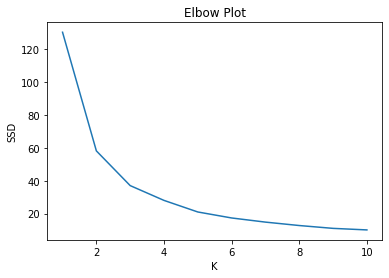

In [20]:
def plot_elbow(dataset, max_clusters):
    """Plot elbow curve for k-means."""
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=768797)
        kmeans.fit(dataset)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias)
    plt.title("Elbow Plot")
    plt.xlabel("K")
    plt.ylabel("SSD")

plot_elbow(iris, 10)

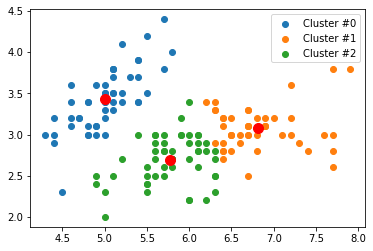

In [21]:
model = KMeans(n_clusters=3)
cluster_labels = model.fit_predict(iris)
plot_kmeans(iris, cluster_labels, model, 3)

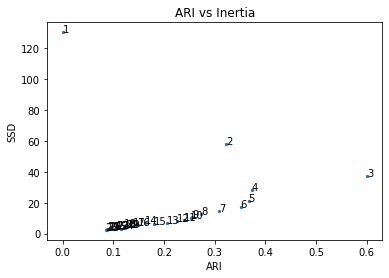

In [22]:
inertias = []
ARIs = []
Ks = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=768797)
    kmeans.fit(iris)
    labels = kmeans.predict(iris)
    inertias.append(kmeans.inertia_)
    ARIs.append(metrics.adjusted_rand_score(iris_true_labels, labels))
    Ks.append(str(i))

fig, ax = plt.subplots()
ax.scatter(ARIs, inertias, s=5)
plt.title("ARI vs Inertia")
plt.xlabel("ARI")
plt.ylabel("SSD")

for i, txt in enumerate(Ks):
    ax.annotate(txt, (ARIs[i], inertias[i]))

# Silhouette Coefficient

A higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

$$ s = \frac{b - a}{max(a, b)} $$


In [23]:
# Showing silhouette coefficient for each sample in each
# cluster is a powerful diagnostic tool
from sklearn.metrics.cluster import silhouette_samples
from sklearn.metrics.cluster import silhouette_score

def plot_silhouette_diagnostics(n_clusters):
    # Compute the silhouette scores for each sample
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    lbls = kmeans.labels_
    values = silhouette_samples(X, lbls)

    g, ax = plt.subplots(figsize=(8, 6))
    color_scale = np.linspace(0, 1, n_clusters)
    y_lower = 1
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        v = sorted(values[lbls == i])
        cluster_size = len(v)
        y_upper = y_lower + cluster_size

        # color mapping:
        c = plt.cm.Set1(color_scale[i])
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, v, facecolor=c, edgecolor=c, alpha=0.8)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
        y_lower = y_upper + 1

    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster label")

    # Red dashed line shows an average silhouette score across all samples in all clusters
    score = silhouette_score(X, lbls, metric='l2')
    ax.axvline(x=score, color="red", linestyle="--")
    ax.set_yticks([])
    plt.show()

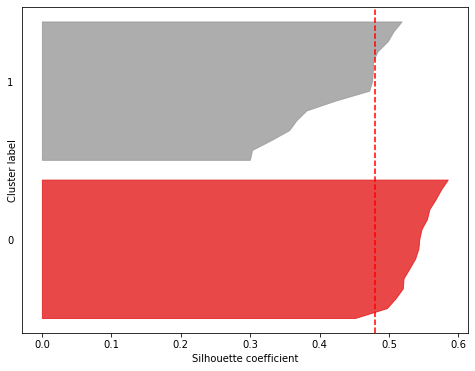

In [24]:
plot_silhouette_diagnostics(2)

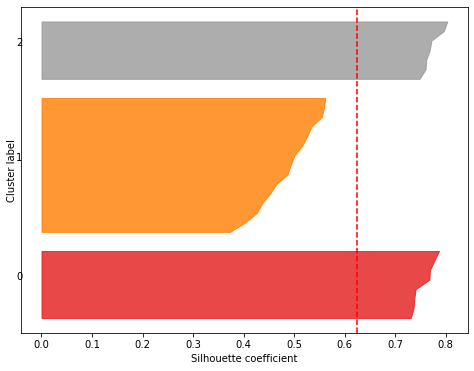

In [25]:
plot_silhouette_diagnostics(3)

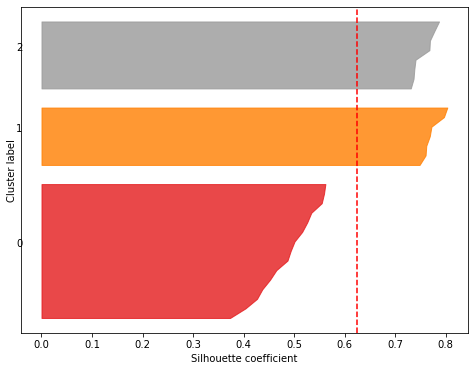

In [26]:
plot_silhouette_diagnostics(3)

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

The values are in the range of -1 to 1.

-1 = bad clustering

1 = perfect dense clusters

0 = overlapping clusters

SC favors dense convex clusters and may fail in other cases.

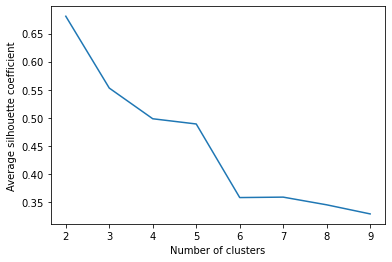

In [27]:
# Silhouette is used for assessing the performance of an unlabeled dataset
from sklearn.metrics.cluster import silhouette_score

def calc_silhouette(dataset, n):
    """Runs Kmeans clustering and returns average silhouette coefficient"""
    kmeans = KMeans(n_clusters=n).fit(dataset)
    score = silhouette_score(dataset, kmeans.labels_)
    return score

scores = {n: calc_silhouette(iris_4d, n) for n in range(2, 10)}
# pprint.pprint(scores)
plt.plot(
    list(scores.keys()),
    list(scores.values())
)

plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette coefficient")
plt.show()

## Understanding clusters

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [29]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [30]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X, y)

DecisionTreeClassifier(random_state=0)

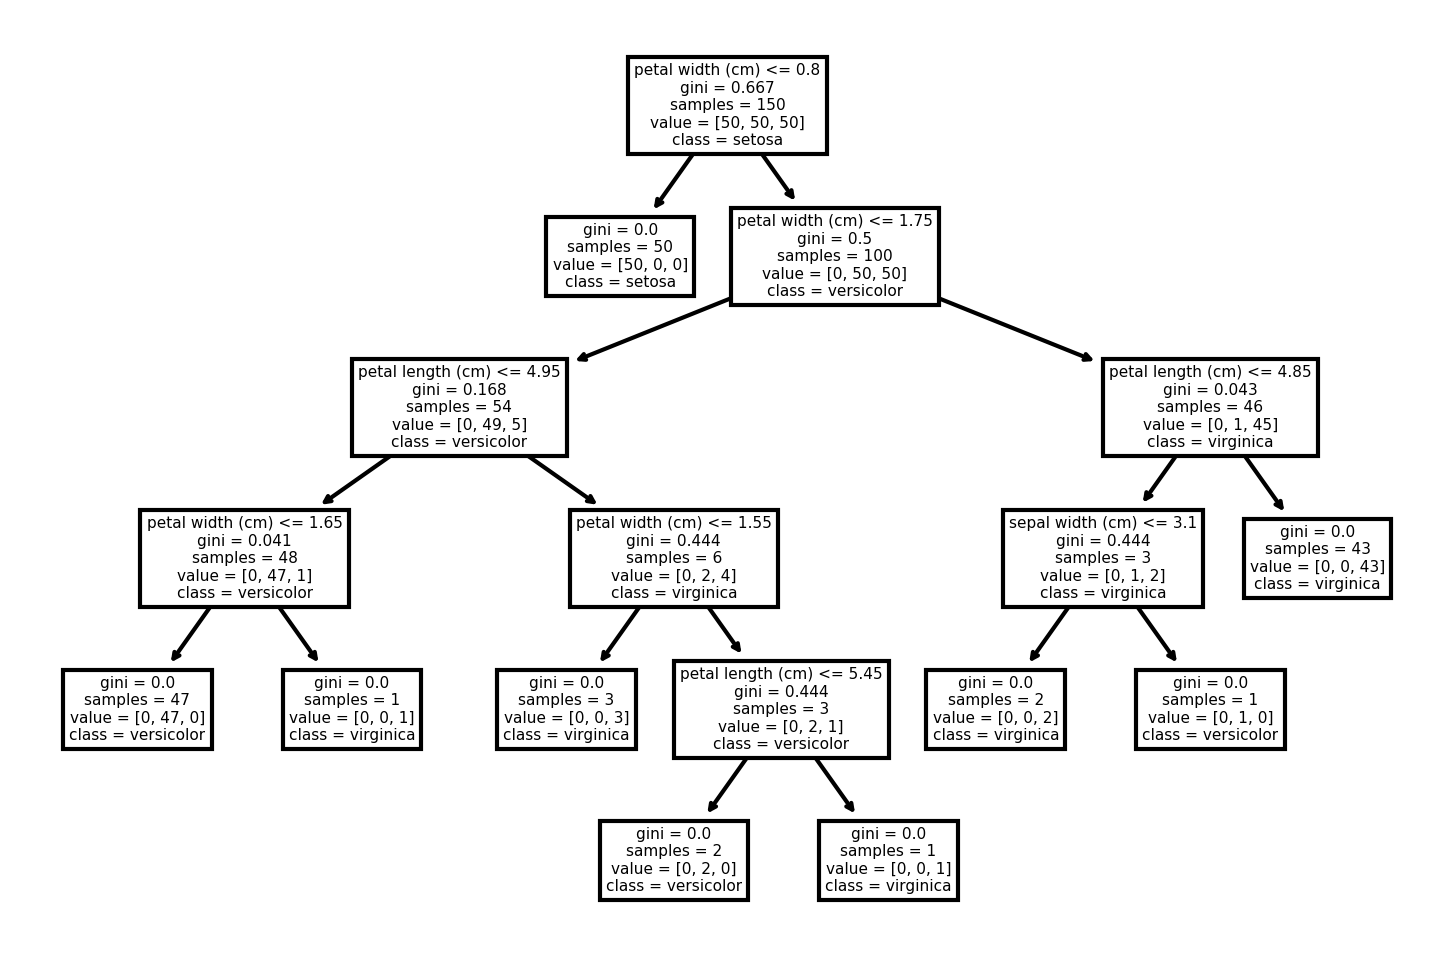

In [31]:
plt.figure(dpi=300)
plot_tree(dt, class_names=iris.target_names, feature_names=iris.feature_names);

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
model = AgglomerativeClustering(n_clusters=3)
cluster_labels = model.fit_predict(X)

In [34]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X, cluster_labels)

DecisionTreeClassifier(random_state=0)

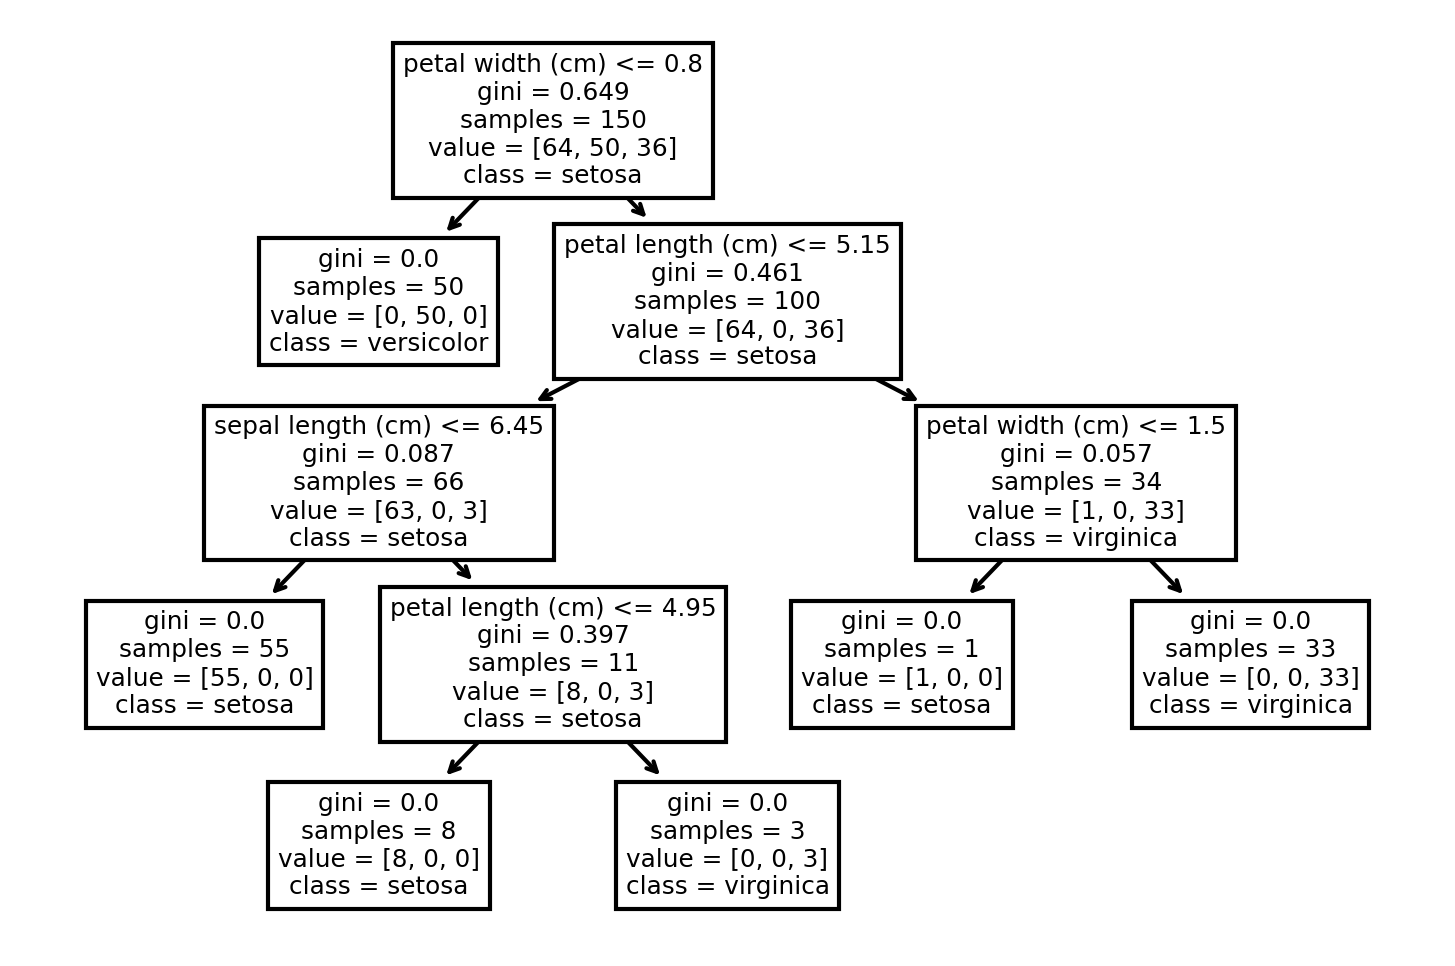

In [35]:
plt.figure(dpi=300)
plot_tree(dt, class_names=iris.target_names, feature_names=iris.feature_names);

### Principal Component Analysis Plot

![](https://chrisalbon.com/images/machine_learning_flashcards/Principal_Component_Analysis_print.png)

In [36]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

colors = ['navy', 'turquoise', 'darkorange']
lw = 2

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461872 0.05306648]


In [37]:
pca_df = pd.DataFrame({
    "PC1": pca.components_[0],
    "PC2": pca.components_[1],
    }, index=iris.feature_names)

In [38]:
pca_df

,PC1,PC2
sepal length (cm),0.361387,0.656589
sepal width (cm),-0.084523,0.730161
petal length (cm),0.856671,-0.173373
petal width (cm),0.358289,-0.075481


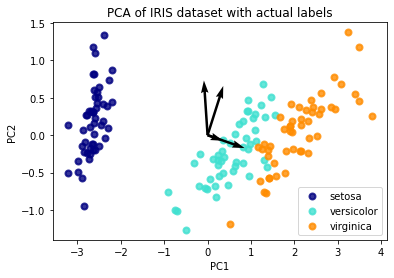

In [39]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset with actual labels');
plt.quiver(
    np.zeros(pca_df.shape[0]), np.zeros(pca_df.shape[0]),
    pca_df.iloc[:, 0], pca_df.iloc[:, 1],
    angles='xy', scale_units='xy', scale=1
)
plt.xlabel("PC1")
plt.ylabel("PC2");

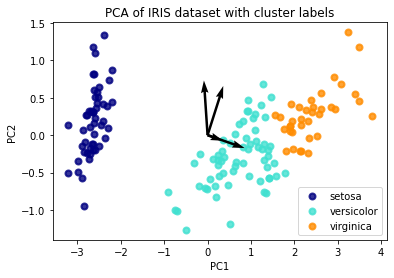

In [40]:
for color, i, target_name in zip(colors, [1, 0, 2], target_names):
    plt.scatter(X_r[cluster_labels == i, 0], X_r[cluster_labels == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset with cluster labels');
plt.quiver(
    np.zeros(pca_df.shape[0]), np.zeros(pca_df.shape[0]),
    pca_df.iloc[:, 0], pca_df.iloc[:, 1],
    angles='xy', scale_units='xy', scale=1
)
plt.xlabel("PC1")
plt.ylabel("PC2");

# Exercises

For this exercises, you will use the *digits* dataset.

The components of this assignment are:
1. Load the digits dataset into a Pandas data frame.
1. Preprocess the digits dataset.
1. Examine how many clusters you may need using the elbow method and silhouette coefficient.
1. Cluster the digits dataset using K-means and evaluate using adjusted rand index.
1. Optional: See how the ARI changes as you alter the K-means parameters.
1. Optional: Use clustering as a classifier and compare to Random Forest.
1. Optional: Write your own implementation of K-means

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Exercise 1. Load the digits dataset into a Pandas data frame

The digits dataset represents images of handwritten digits. Each image is a 32x32 bitmap. To create a numerical dataset representing the images, each image was divided into non-overlapping blocks of 4x4, and the number of set pixels in each block is counted.

Thus, each image is represented by an 8x8 matrix of integers in the range 0-16. Each sample in the dataset therefore has 64 attributes. There are a total of 1,797 samples in the dataset we will use.

Therefore, the digits dataset should be loaded into a Pandas dataframe with 1,797 rows and 64 columns.

In this task, you will load the digits dataset (http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes) into a Pandas dataframe. Note that the final column in this dataset is the correct label (an integer in the range 0-9).

Load the attributes into a Pandas dataframe named **digits**. This dataframe should *not* include the final column, as we only want to load the features here.

Instead, save the final column into a Pandas series named **labels**.

In [42]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes"
# YOUR CODE HERE

## Exercise 2. Preprocess the digits dataset

Standardize the data so that each column has a mean of (or very close to) zero and a standard deviation of (or very close to) 1. Make sure the resulting data is a Pandas dataframe (if it is not, convert it to one using pd.DataFrame). You can use `sklearn.preprocessing.scale`

Note that some of the columns are all zeros across all samples. In this case, you can leave the column as is. In theory you could remove those columns as they do not contribute any information to clustering, but in our case they do not affect the results so we will keep them. For this reason, our assertions makes sure that all the columns have a standard variation of one **except** those columns that are all zeros.

In [43]:
# YOUR CODE HERE

## Exercise 3. Examine how many clusters you may need using the elbow method and silhouette coefficient

The K-means algorithm requires us to specify the number of clusters. One way to assess this is using the elbow method.

Use the elbow method and see if there is a clear number of clusters that make sense in the digits dataset. Note that this is just for exploratory purposes; we know the number of clusters should be 10, and that is what we will use in the future components of this exercise.

The elbow method consists of visualizing the sum of squared distances between samples and their closest cluster center. This is done by creating a scatter plot where the number of clusters used in K-means is provided on the X axis and the sum of squared distances is provided on the Y axis. If there is a clear inflection point, that can be an indicator of the ideal number of clusters.

Run the K-means algorithm on the digits dataset 24 times. In the first run set the number of clusters to **2**, in the second to **3**, and so on through **25**. For each run, collect the sum of squared distances. Save these into a list named **ssds**.

Create an elbow plot and examine whether you can see a clear inflection point.

Use silhouette_score function to calculate Silhouette Coefficient (SC)
    from sklearn.metrics.cluster import silhouette_score

Explore dependence of SC on the number of clusters in K-means algorithm. Save the values to a list named **scs**.

Create a plot with SC and inspect for inflection points.

**Note:**
In order for our assertions to work, make sure you use the default parameters for KMeans, with the exception of random_state, which you should set to 126, i.e. to run with one cluster:
```python
KMeans(n_clusters=1, random_state=126)
```

and so forth.

In [44]:
# YOUR CODE HERE

## Exercise 4. Cluster the digits dataset using K-means and evaluate using adjusted rand index (ARI)

Go ahead and cluster the dataset using K-means.

Set the number of clusters to ten and and the random_state to 126:
```python
KMeans(n_clusters=10, random_state=126)
```

Evaluate your clusters using the ARI. You can import the ARI function from sklearn.metrics:

```python
from sklearn.metrics import adjusted_rand_score
```

Save the ARI to the variable *score*. Save the KMeans model to the variable *model*.

In [45]:
# YOUR CODE HERE

## Exercise 5. How does the ARI change when you alter the K-means parameters?

Explore the effect on the ARI of changing the KMeans parameters, such as: init, n_init, max_iter.

Compare to other evaluations, such as: homogeneity score, completeness score, and the silhouette coefficient.

In [46]:
# YOUR CODE HERE

## Exercise 6. Clustering as a classifier?

Can you use clustering as a classifier for the digits dataset? How does it compare to classification algorithms such as random forest?

One way of comparing the methods would be interpreting the results of classification as cluster label assignment and using ARI for comparison.

Alternatively, you can use cluster labels as new features added to the dataset, for instance with one-hot-encoding sklearn.preprocessing.OneHotEncoder() so that:
    1. labels = clustering.fit_predict(X)
    2. new columns = OneHotEncoder(labels)
    3. add new columns to X with np.hstack() or similar approach
    4. classifier.fit(X, y)
    5. evaluate performance improvement, if any


In [47]:
# YOUR CODE HERE

## Exercise 7. Implement K-means

Can you write your own simple implementation of K-means algorithm with .fit_predict(X) method that returns cluster labels for dataset X?

```
class MyKmeans(object):
    def __init__(self, n_clusters):
        pass

    def fit_predict(X):
        return labels

```

Your .fit_predict() method can implement Lloyds algorithm, for instance, that consists of the following three steps:

1. assign random values for k means $m_1,...,m_k$

Make iterations (while loop or for loop) that alternate between:
2. Assignment step: Assign each example in X to the cluster whose mean has the least squared Euclidean distance, this is intuitively the "nearest" mean $m$

3. Update step: Calculate the new means $m$ (centroids) of the examples in the new clusters.

The process typically stops when there is no update happening in Update step or when a certain number of iterations is reached.

The index $i$ of a mean $m_i$ assigned to example is interpreted as its cluster label.

In [48]:
# YOUR CODE HERE